In [34]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Define the file path
filename = 'dsprites_gamma_6.4_zDim_10_lrVAE_0.0001_lrD_0.0001_rseed_0_run_6'
file_path = f'records/{filename}.txt'

# Initialize lists to hold the values
vae_loss_values = []
dis_loss_values = []
recon_values = []
kl_values = []
kl_alpha_values = []
tc_values = []
a_values = []
b_values = []
ah_values = []
bh_values = []

# Regular expression patterns to extract the values
vae_loss_pattern = re.compile(r'vae_loss:\s*([\d\.]+)')
dis_loss_pattern = re.compile(r'dis_loss:\s*([\d\.]+)')
recon_pattern = re.compile(r'recon:\s*([\d\.]+)')
kl_pattern = re.compile(r'kl:\s*([\d\.]+)')
kl_alpha_pattern = re.compile(r'kl_alpha:\s*([\d\.]+)')
tc_pattern = re.compile(r'tc:\s*([\d\.\-]+)')
a_pattern = re.compile(r'a = \[([\d\.\s]+)\]')
b_pattern = re.compile(r'b = \[([\d\.\s]+)\]')
ah_pattern = re.compile(r'ah = \[([\d\.\s]+)\]')
bh_pattern = re.compile(r'bh = \[([\d\.\s]+)\]')

# Read the file and extract the values
with open(file_path, 'r') as file:
    for line in file:

        vae_loss_match = vae_loss_pattern.search(line)
        if vae_loss_match:
            vae_loss_values.append(float(vae_loss_match.group(1)))

        dis_loss_match = dis_loss_pattern.search(line)
        if dis_loss_match:
            dis_loss_values.append(float(dis_loss_match.group(1)))

        recon_match = recon_pattern.search(line)
        if recon_match:
            recon_values.append(float(recon_match.group(1)))

        kl_match = kl_pattern.search(line)
        if kl_match:
            kl_values.append(float(kl_match.group(1)))

        kl_alpha_match = kl_alpha_pattern.search(line)
        if kl_alpha_match:
            kl_alpha_values.append(float(kl_alpha_match.group(1)))

        tc_match = tc_pattern.search(line)
        if tc_match:
            tc_values.append(float(tc_match.group(1)))

        a_match = a_pattern.search(line)
        if a_match:
            a_list = [float(val) for val in a_match.group(1).split()]
            a_values.append(a_list)

        b_match = b_pattern.search(line)
        if b_match:
            b_list = [float(val) for val in b_match.group(1).split()]
            b_values.append(b_list)

        ah_match = ah_pattern.search(line)
        if ah_match:
            ah_list = [float(val) for val in ah_match.group(1).split()]
            ah_values.append(ah_list)

        bh_match = bh_pattern.search(line)
        if bh_match:
            bh_list = [float(val) for val in bh_match.group(1).split()]
            bh_values.append(bh_list)

In [19]:
from scipy.ndimage import gaussian_filter1d

In [1]:
loss_iter_intv = 1000
loss_iter_max = 102_000

plt.figure(figsize=(12, 8))

plt.plot(gaussian_filter1d(vae_loss_values, 10)[100:], label='VAE Loss', color='blue')
plt.plot(gaussian_filter1d(recon_values, 10)[100:], label='Reconstruction Loss', color='green')
plt.plot(gaussian_filter1d(kl_values, 10)[100:], label='KL Divergence', color='purple')
plt.plot(gaussian_filter1d(tc_values, 10)[100:], label='TC Loss', color='orange')
plt.plot(gaussian_filter1d(kl_alpha_values, 10)[100:], label='KL Alpha', color='brown')
plt.plot(gaussian_filter1d(dis_loss_values, 10)[100:], label='Discriminator Loss', color='red')

is_log = True
plt.xlabel('Iteration')
if is_log:
    plt.yscale('log')
log_suffix = ' (logscale)' if is_log else ''
plt.ylabel(f'Loss Value {log_suffix}')
plt.title(f'Losses over Iterations {log_suffix}')
plt.legend()
plt.grid(True, which="both", ls="--")

iter_freq = 200
plt.xticks(ticks=np.linspace(0, loss_iter_max//loss_iter_intv, 5), labels=[str(x * loss_iter_intv) for x in np.linspace(0, loss_iter_max//loss_iter_intv, 5,dtype=int)])
plt.show()

NameError: name 'plt' is not defined

In [35]:
print(np.array(ah_values).shape)
print(np.array(bh_values).shape)

(1800, 10)
(1800, 10)


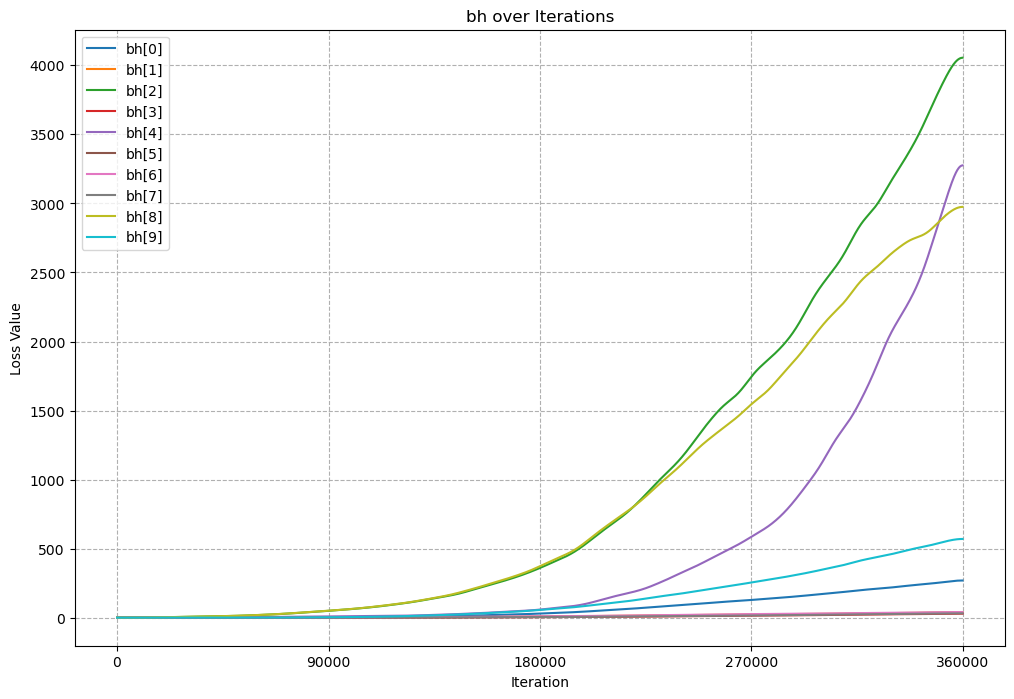

In [36]:
plt.figure(figsize=(12, 8))

for x_i in range(len(bh_values[0])):
    smoothed_sig = gaussian_filter1d(np.array(bh_values)[:,x_i], 20)
    plt.plot(smoothed_sig, label=f'bh[{x_i}]')

plt.xlabel('Iteration')
plt.ylabel('Loss Value')
plt.title('bh over Iterations')
plt.legend()
plt.grid(True, which="both", ls="--")

iter_freq = 200
plt.xticks(ticks=np.linspace(0, 360_000//iter_freq, 5), labels=[str(x * iter_freq) for x in np.linspace(0, 360_000//iter_freq, 5,dtype=int)])
plt.show()

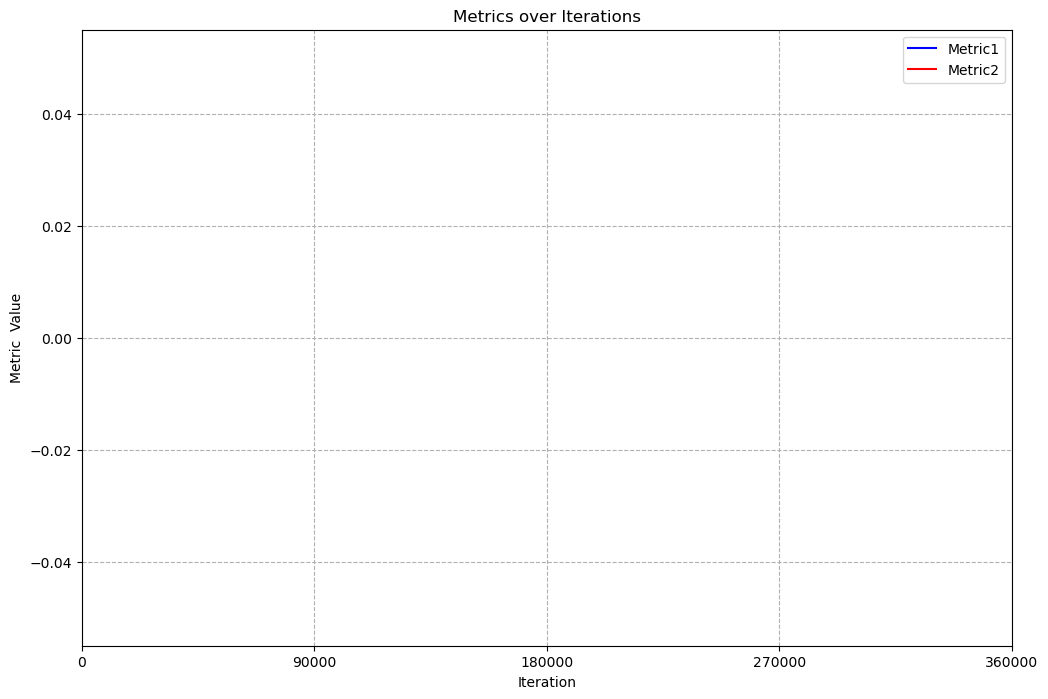

In [13]:
plt.figure(figsize=(12, 8))

plt.plot(gaussian_filter1d(metric1_values,10), label='Metric1', color='blue')
plt.plot(gaussian_filter1d(metric2_values,10), label='Metric2', color='red')

plt.xlabel('Iteration')
plt.ylabel('Metric  Value')
plt.title('Metrics over Iterations')
plt.legend()
plt.grid(True, which="both", ls="--")

iter_freq = 50
plt.xticks(ticks=np.linspace(0, 360_000//iter_freq, 5), labels=[str(x * iter_freq) for x in np.linspace(0, 360_000//iter_freq, 5,dtype=int)])
plt.show()